### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/election_data.csv')

# clean table
df = df.drop(columns="Погашенных бюллетеней")
df = df.drop(columns="Выдано избирателям вне пункта голосования")
df = df.drop(columns="Недействительных бюллетеней")
df = df.drop(columns="Неучтенных бюллетеней")
df = df.drop(columns="Утраченных бюллетеней")
df = df.drop(columns="Выдано избирателям в пункте голосования")
df = df.drop(columns="Всего избирателей")
df = df.drop(columns="Действительных бюллетеней")


df.head(10)

,ТИК,УИК,Полученные бюллетени,Бюллетеней в переносных ящиках,Бюллетеней в стационарных ящиках,Амосов,Беглов,Тихонова
0,1,1,1200,11,587,110,345,120
1,1,2,1100,14,430,53,326,46
2,1,3,1600,22,576,155,332,96
3,1,4,1000,4,318,67,171,71
4,1,5,1400,8,493,137,266,82
5,1,6,1200,13,453,118,263,73
6,1,7,1600,17,532,131,305,100
7,1,8,1100,13,590,127,364,93
8,1,9,1300,26,473,128,253,101
9,1,10,1200,7,486,118,267,94


In [2]:
df["Всего"] = df["Бюллетеней в переносных ящиках"] + df["Бюллетеней в стационарных ящиках"]
df["Явка"] = df["Всего"] / df["Полученные бюллетени"]

df.sort_values("Явка", ascending=False, inplace=True)

df.head()

,ТИК,УИК,Полученные бюллетени,Бюллетеней в переносных ящиках,Бюллетеней в стационарных ящиках,Амосов,Беглов,Тихонова,Всего,Явка
146,2,2308,300,13,287,11,269,15,300,1.000000
1154,18,1665,183,61,122,18,129,32,183,1.000000
1267,20,1983,169,76,93,9,152,5,169,1.000000
1155,18,1667,126,119,7,17,91,17,126,1.000000
1142,18,1653,1700,55,1639,154,1385,128,1694,0.996471


In [3]:
df["За Амосова"] = 0
df["За Беглова"] = 0
df["За Тихонову"] = 0

df.loc[df["Всего"] >= 100, "За Амосова"] = np.around(df["Амосов"] / df["Всего"], 2)
df.loc[df["Всего"] >= 100, "За Беглова"] = np.around(df["Беглов"] / df["Всего"], 2)
df.loc[df["Всего"] >= 100, "За Тихонову"] = np.around(df["Тихонова"] / df["Всего"], 2)
    
df.loc[df["Всего"] >= 100].head()

,ТИК,УИК,Полученные бюллетени,Бюллетеней в переносных ящиках,Бюллетеней в стационарных ящиках,Амосов,Беглов,Тихонова,Всего,Явка,За Амосова,За Беглова,За Тихонову
146,2,2308,300,13,287,11,269,15,300,1.000000,0.04,0.90,0.05
1154,18,1665,183,61,122,18,129,32,183,1.000000,0.10,0.70,0.17
1267,20,1983,169,76,93,9,152,5,169,1.000000,0.05,0.90,0.03
1155,18,1667,126,119,7,17,91,17,126,1.000000,0.13,0.72,0.13
1142,18,1653,1700,55,1639,154,1385,128,1694,0.996471,0.09,0.82,0.08


In [4]:
df.loc[df["За Амосова"] == df["За Амосова"].max()]

,ТИК,УИК,Полученные бюллетени,Бюллетеней в переносных ящиках,Бюллетеней в стационарных ящиках,Амосов,Беглов,Тихонова,Всего,Явка,За Амосова,За Беглова,За Тихонову
1085,17,567,2000,8,635,267,284,67,643,0.3215,0.42,0.44,0.1


In [5]:
df.loc[df["За Беглова"] == df["За Беглова"].max()]

,ТИК,УИК,Полученные бюллетени,Бюллетеней в переносных ящиках,Бюллетеней в стационарных ящиках,Амосов,Беглов,Тихонова,Всего,Явка,За Амосова,За Беглова,За Тихонову
1395,22,343,4000,0,3523,23,3451,49,3523,0.88075,0.01,0.98,0.01
1453,22,403,1000,600,68,6,652,7,668,0.66800,0.01,0.98,0.01


In [6]:
df.loc[df["За Тихонову"] == df["За Тихонову"].max()]

,ТИК,УИК,Полученные бюллетени,Бюллетеней в переносных ящиках,Бюллетеней в стационарных ящиках,Амосов,Беглов,Тихонова,Всего,Явка,За Амосова,За Беглова,За Тихонову
1094,17,2283,2000,3,641,117,215,306,644,0.322,0.18,0.33,0.48


In [7]:
groups = df.groupby("ТИК")

tik_max, tik_min = groups["Явка"].max(), groups["Явка"].min()
(tik_max - tik_min).sort_values()

ТИК
25    0.201727
12    0.385500
15    0.415000
16    0.440381
24    0.451600
14    0.465333
6     0.506000
5     0.541843
4     0.552000
9     0.555600
10    0.622500
18    0.644000
3     0.649500
22    0.654750
29    0.663400
21    0.665167
13    0.667048
1     0.667619
17    0.688500
27    0.698857
8     0.702000
7     0.705024
19    0.715170
11    0.740600
28    0.746750
26    0.751004
20    0.784000
30    0.786000
2     0.798667
23    0.823333
Name: Явка, dtype: float64

In [8]:
groups["Явка"].var()

ТИК
1     0.018860
2     0.020648
3     0.008317
4     0.006756
5     0.004596
6     0.003318
7     0.009863
8     0.017331
9     0.014754
10    0.011596
11    0.015942
12    0.004863
13    0.035362
14    0.006563
15    0.013588
16    0.007444
17    0.013649
18    0.029328
19    0.024026
20    0.015827
21    0.014854
22    0.010363
23    0.016332
24    0.008813
25    0.001442
26    0.014831
27    0.015498
28    0.018143
29    0.009735
30    0.029710
Name: Явка, dtype: float64

In [9]:
counts_amosov = df.groupby("За Амосова").count()["УИК"]
counts_beglov = df.groupby("За Беглова").count()["УИК"]
counts_tikhonova = df.groupby("За Тихонову").count()["УИК"]

data1 = {"Амосов": counts_amosov.index, "Количество УИК за Амосова": counts_amosov}
data2 = {"Беглов": counts_beglov.index, "Количество УИК за Беглова": counts_beglov}
data3 = {"Тихонова": counts_tikhonova.index, "Количество УИК за Тихонову": counts_tikhonova}

In [10]:
frame = pd.DataFrame(data=data1)
frame

,Амосов,Количество УИК за Амосова
За Амосова,,
0.00,0.00,15
0.01,0.01,6
0.02,0.02,6
0.03,0.03,2
0.04,0.04,13
0.05,0.05,17
0.06,0.06,23
0.07,0.07,35
0.08,0.08,47


In [11]:
frame = pd.DataFrame(data=data2)
frame

,Беглов,Количество УИК за Беглова
За Беглова,,
0.00,0.00,15
0.30,0.30,1
0.32,0.32,1
0.33,0.33,2
0.38,0.38,3
...,...,...
0.93,0.93,1
0.94,0.94,3
0.95,0.95,1


In [12]:
frame = pd.DataFrame(data=data3)
frame

,Тихонова,Количество УИК за Тихонову
За Тихонову,,
0.00,0.00,16
0.01,0.01,4
0.02,0.02,5
0.03,0.03,11
0.04,0.04,8
0.05,0.05,14
0.06,0.06,21
0.07,0.07,22
0.08,0.08,35


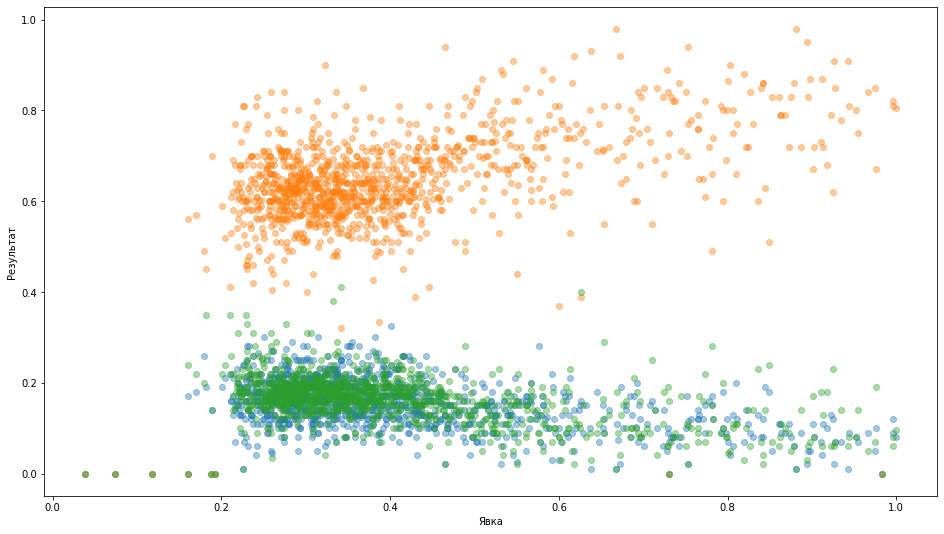

In [13]:
import matplotlib.pyplot as plt


amosov = df.loc[df["За Амосова"] != -1].groupby("Явка")["За Амосова"].mean()
beglov = df.loc[df["За Беглова"] != -1].groupby("Явка")["За Беглова"].mean()
tikhonova = df.loc[df["За Тихонову"] != -1].groupby("Явка")["За Тихонову"].mean()


plt.figure(figsize=(16, 9))
plt.scatter(amosov.index, amosov.values, alpha=0.4)
plt.scatter(beglov.index, beglov.values, alpha=0.4)
plt.scatter(tikhonova.index, tikhonova.values, alpha=0.4)
plt.xlabel("Явка")
plt.ylabel("Результат")
plt.show()